In [ ]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import datetime
import time

In [45]:
help(CoinGeckoAPI)

Help on class CoinGeckoAPI in module pycoingecko.api:

class CoinGeckoAPI(builtins.object)
 |  CoinGeckoAPI(api_base_url='https://api.coingecko.com/api/v3/')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api_base_url='https://api.coingecko.com/api/v3/')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_coin_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_history_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_info_from_contract_address_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_market_chart_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_market_chart_from_contract_address_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_market_chart_range_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_market_chart_range_from_contract_address_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_ohlc_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin_status_updates_by_id = input_args(*args, **kwargs)
 |  
 |  get_coin

In [41]:

start = datetime.datetime(2013, 1, 1, 0, 0) #can allow users to enter in date time
start = datetime.datetime.timestamp(start)
start = str(start)

end = datetime.datetime.now() #can allow users to enter in date time
end = datetime.datetime.timestamp(end)
end = str(end)

print(f'''start{start}
end:{end}''')

1357027200.0,
1621040234.448588


In [102]:
# API call to CoinGecko to collect crypto currencty data based on id's...need to write function to collect closing prices

cg = CoinGeckoAPI()
cg.get_price(ids='bitcoin', vs_currencies='usd')
api_data = cg.get_coin_market_chart_range_by_id('bitcoin', 'usd', start, end)



In [112]:
i=api_data['prices']


df=pd.DataFrame(i, columns=['time','prices'])
#df['time'].astype(int)
df['time'] = pd.to_datetime(df['time'], origin='unix', unit='ms') #links (was having issue converting UNIX this helped https://github.com/pandas-dev/pandas/issues/10987)
df.set_index('time', inplace=True)

df


,prices
time,
2013-04-28,135.300000
2013-04-29,141.960000
2013-04-30,135.300000
2013-05-01,117.000000
2013-05-02,103.430000
...,...
2021-05-11,55901.667595
2021-05-12,56928.972357
2021-05-13,50004.762183


In [29]:
help(cg.get_coin_market_chart_range_by_id)

Help on method input_args in module pycoingecko.utils:

input_args(*args, **kwargs) method of pycoingecko.api.CoinGeckoAPI instance



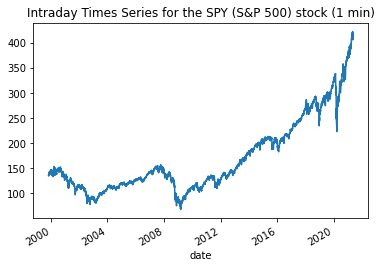

             1. open   2. high    3. low  4. close    5. volume
date                                                           
2021-05-14  413.2100  417.4900  413.1800  416.5800   80537098.0
2021-05-13  407.0700  412.3500  407.0200  410.2800  106393963.0
2021-05-12  411.2300  412.5900  404.0000  405.4100  134811046.0
2021-05-11  413.1000  415.2700  410.0600  414.2100  116887975.0
2021-05-10  422.5000  422.7400  417.8100  417.9400   81852446.0
...              ...       ...       ...       ...          ...
1999-11-05  138.6250  139.1093  136.7812  137.8750    7431500.0
1999-11-04  136.7500  137.3593  135.7656  136.5312    7907500.0
1999-11-03  136.0000  136.3750  135.1250  135.5000    7222300.0
1999-11-02  135.9687  137.2500  134.5937  134.5937    6516900.0
1999-11-01  136.5000  137.0000  135.5625  135.5625    4006500.0

[5419 rows x 5 columns]


In [22]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='M5OHGR4HTJKK00SG', output_format='pandas')
data, meta_data = ts.get_daily(symbol='SPY', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the SPY (S&P 500) stock (daily)')
plt.show()
print(data)

In [23]:
help(ts)

Help on TimeSeries in module alpha_vantage.timeseries object:

class TimeSeries(alpha_vantage.alphavantage.AlphaVantage)
 |  TimeSeries(key=None, output_format='json', treat_info_as_error=True, indexing_type='date', proxy=None, rapidapi=False)
 |  
 |  This class implements all the api calls to times series
 |  
 |  Method resolution order:
 |      TimeSeries
 |      alpha_vantage.alphavantage.AlphaVantage
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  get_daily(self, symbol, outputsize='compact')
 |      Return daily time series in two json objects as data and
 |      meta_data. It raises ValueError when problems arise
 |      
 |      Keyword Arguments:
 |          symbol:  the symbol for the equity we want to get its data
 |          outputsize:  The size of the call, supported values are
 |              'compact' and 'full; the first returns the last 100 points in the
 |              data series, and 'full' returns the full-length daily times
 |              series

In [131]:
#list of dictionaries for each crypto...keys are 'id', 'symbol' etc...max per page is 250 so to get 500 coins and save results to variables cg_1, cg_2
cg_1 = cg.get_coins_markets(order='market_cap_desc', vs_currency='usd', per_page=250, page=1)
cg_2 = cg.get_coins_markets(order='market_cap_desc', vs_currency='usd', per_page=250, page=2)

#loop through data from CoinGecko stored in `cg_1` and `cg_2` using `cg.get_coin_markets` and save to list `coin_list`
coin_list = []
for coin in cg_1:
    coin_list.append([coin['id'], coin['symbol'], coin['name'], coin['image'], coin['market_cap'], coin['market_cap_rank']])
    
for coin in cg_2:
    coin_list.append([coin['id'], coin['symbol'], coin['name'], coin['image'], coin['market_cap'], coin['market_cap_rank']])
    
coin_list_df = pd.DataFrame(coin_list, columns=['CG id','CG symbol', 'name', 'image', 'market_cap', 'market cap rank'])
coin_list_df
coin_list_df.to_csv('coin_list.csv')

# how to save/look up save time of file: https://stackoverflow.com/questions/237079/how-to-get-file-creation-modification-date-times-in-python
# can use this for decide if making api call is necessary